In [ ]:
pip install seaborn
pip install scipy
pip install plotly
pip install pandas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats

## Load_data

In [ ]:
df = pd.read_csv(r"C:\Users\shank\Desktop\github_data\employee_data.csv")
df

#from this above dataset we can cleary see salary as target column and rest all independant column

## sanity check of the data

In [3]:
df.shape

(400, 5)

In [4]:
df.info()
#by this dataset we can see some missing values in some columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  400 non-null    int64 
 1   Gender              400 non-null    object
 2   Experience (Years)  400 non-null    int64 
 3   Position            400 non-null    object
 4   Salary              400 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 15.8+ KB


In [5]:
df.columns

Index(['ID', 'Gender', 'Experience (Years)', 'Position', 'Salary'], dtype='object')

In [6]:
#finidng missing values

df.isnull().sum()

#missing values columns- no missing values

ID                    0
Gender                0
Experience (Years)    0
Position              0
Salary                0
dtype: int64

In [7]:
#checking duplicates
df.duplicated().sum() #it will check the entire row, if entire row is repeated then it will give true as output else false

#here in this df we dont have any duplicate values

0

In [8]:
df.duplicated().unique()
#by this we can understand there is no duplicate values

array([False])

In [9]:
#finding garbage values -- this is mostly in object dtype column like some unwanted alphanumeric values

for i in df.select_dtypes(include="object").columns:
    print(i)
    print(df[i].value_counts())

Gender
Gender
M    202
F    198
Name: count, dtype: int64
Position
Position
Web Developer                   43
IT Manager                      40
IT Security Analyst             39
Systems Administrator           38
Database Administrator (DBA)    38
DevOps Engineer                 37
Systems Analyst                 37
Software Engineer               36
Network Administrator           31
IT Support Specialist           31
Cloud Solutions Architect       30
Name: count, dtype: int64


In [10]:
#spelling check for object datatype columns befor encoding
for i in df.select_dtypes(include="object").columns:
    print(df[i].unique(),df[i].nunique())
    print("****"*10)


['F' 'M'] 2
****************************************
['DevOps Engineer' 'Web Developer' 'Systems Administrator' 'IT Manager'
 'Network Administrator' 'Database Administrator (DBA)'
 'IT Security Analyst' 'Software Engineer' 'IT Support Specialist'
 'Systems Analyst' 'Cloud Solutions Architect'] 11
****************************************


## EDA

In [11]:
df.isnull().sum()

ID                    0
Gender                0
Experience (Years)    0
Position              0
Salary                0
dtype: int64

In [12]:
df.head()

,ID,Gender,Experience (Years),Position,Salary
0,1,F,4,DevOps Engineer,109976
1,2,M,6,DevOps Engineer,120088
2,3,M,17,Web Developer,181301
3,4,M,7,Systems Administrator,77530
4,5,F,13,Systems Administrator,152397


In [13]:
#from this dataset ID column is unique value so we dont need that column for model building we can drop 

df.drop("ID",axis=1,inplace =True)

In [14]:
df.head() #no we removed that columns

,Gender,Experience (Years),Position,Salary
0,F,4,DevOps Engineer,109976
1,M,6,DevOps Engineer,120088
2,M,17,Web Developer,181301
3,M,7,Systems Administrator,77530
4,F,13,Systems Administrator,152397


In [17]:
#speliing  check and encoding for object datatype

#using ordinalencoder

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

df["Gender"] = enc.fit_transform(df[["Gender"]])
df["Position"] = enc.fit_transform(df[["Position"]])

df.head()

,Gender,Experience (Years),Position,Salary
0,0.0,4,2.0,109976
1,1.0,6,2.0,120088
2,1.0,17,10.0,181301
3,1.0,7,8.0,77530
4,0.0,13,8.0,152397


In [18]:
df["Gender"].unique() #F - 0, M -1

array([0., 1.])

In [19]:
df["Position"].unique()

#'DevOps Engineer'-2, 'Web Developer'-10, 'Systems Administrator'-8, 'IT Manager'-3,
# 'Network Administrator'-6, 'Database Administrator (DBA)'-1
# 'IT Security Analyst'-4, 'Software Engineer'-7, 'IT Support Specialist'-5,
# 'Systems Analyst'-9 'Cloud Solutions Architect'-0

array([ 2., 10.,  8.,  3.,  6.,  1.,  4.,  7.,  5.,  9.,  0.])

In [20]:
#now we converted non numeric column to numeric column


In [21]:
df.info() #now we transformed every column into numerical datatypes format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              400 non-null    float64
 1   Experience (Years)  400 non-null    int64  
 2   Position            400 non-null    float64
 3   Salary              400 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 12.6 KB


In [22]:
df.head()


,Gender,Experience (Years),Position,Salary
0,0.0,4,2.0,109976
1,1.0,6,2.0,120088
2,1.0,17,10.0,181301
3,1.0,7,8.0,77530
4,0.0,13,8.0,152397


In [23]:
#Descriptive statistics - it will show for only numerical columns

df.describe() 

#by this we can understand how the dataset is and how is spearding 

,Gender,Experience (Years),Position,Salary
count,400.000000,400.000000,400.000000,400.00000
mean,0.505000,9.670000,5.120000,131701.19750
std,0.500601,6.101571,3.193132,43351.50899
min,0.000000,0.000000,0.000000,43643.00000
25%,0.000000,4.000000,2.000000,100484.75000
50%,1.000000,10.000000,5.000000,128561.50000
75%,1.000000,15.000000,8.000000,157735.00000
max,1.000000,20.000000,10.000000,269950.00000


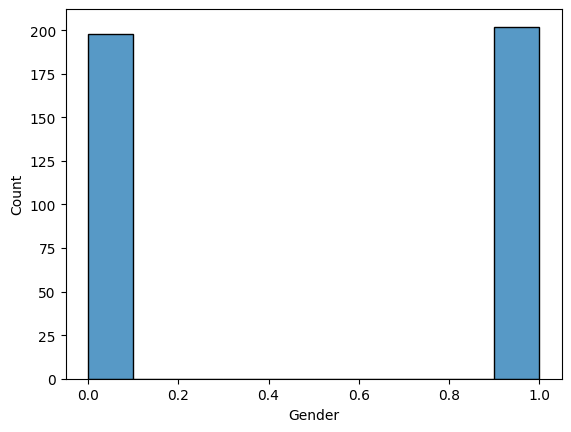

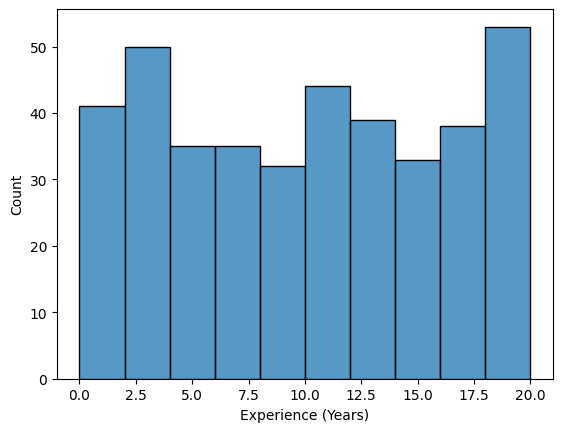

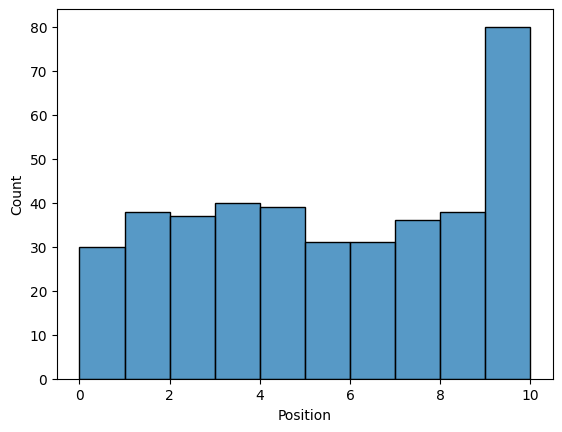

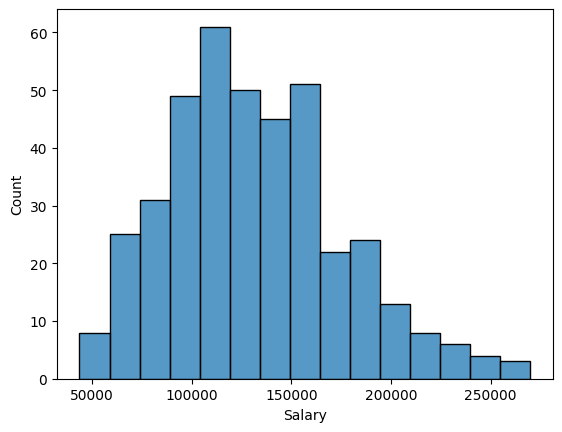

In [24]:
#histogram - to understand the distibution - frequency plot
#only for numerical columns

for i in df.columns:
    sns.histplot(data = df , x = i)
    plt.show()

In [25]:
#from this above plotting we can see how is each column spreading , here some of the columns having skewness we have to check that

## Outliers detection

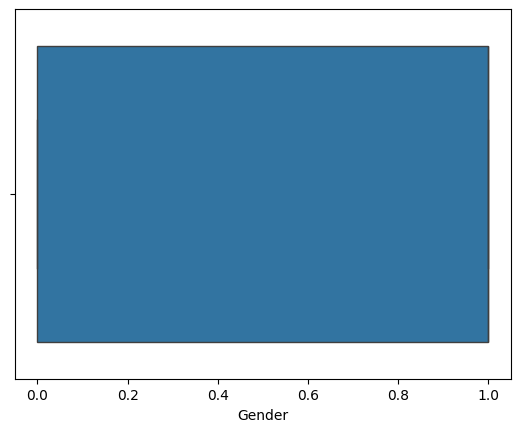

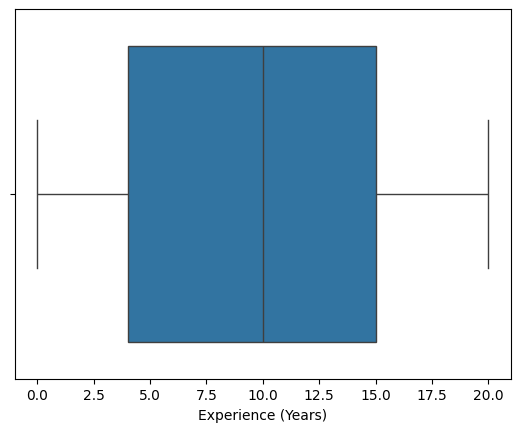

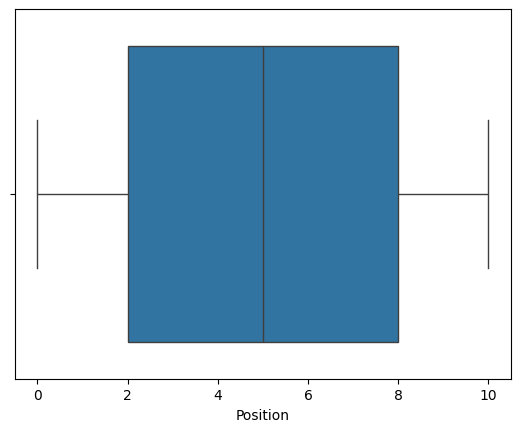

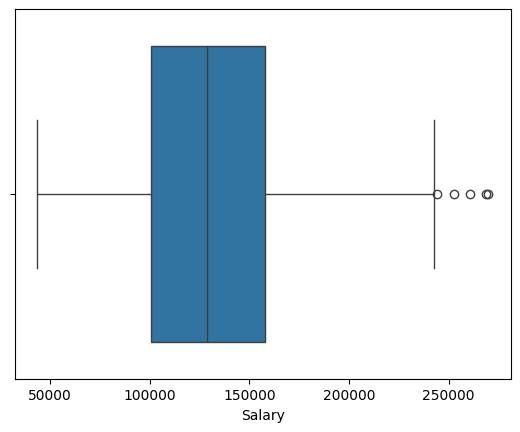

In [26]:
#boxplot for outliers

for i in df.columns:
    sns.boxplot(data=df, x = i)
    plt.show()

In [ ]:
#we dont have outliers in this dataset
#we have some outliers in target column bt we dont have to change that

## skewness and kurtosis

In [27]:
from scipy.stats import norm

In [28]:
import warnings
warnings.filterwarnings("ignore")

Gender -0.020076365004591326


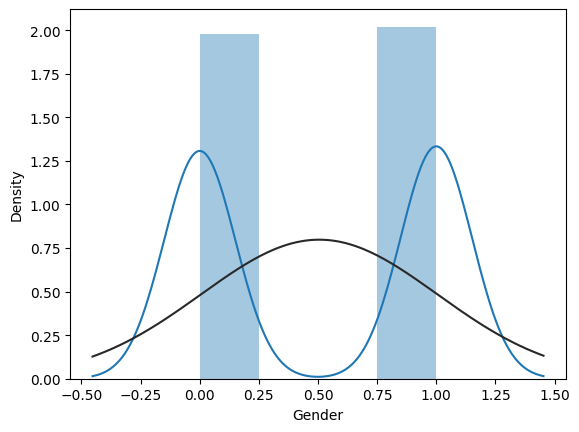

Experience (Years) 0.05537975033056568


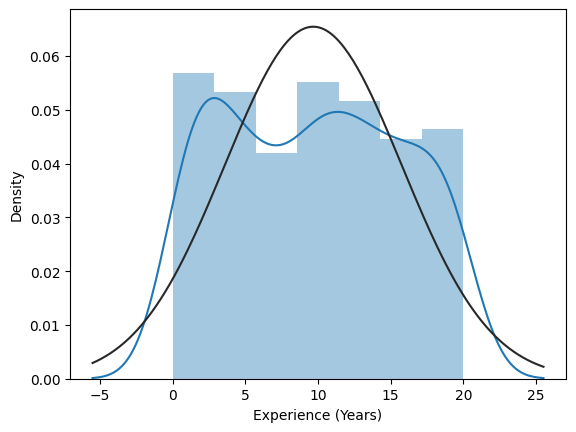

Position 0.006401498270110308


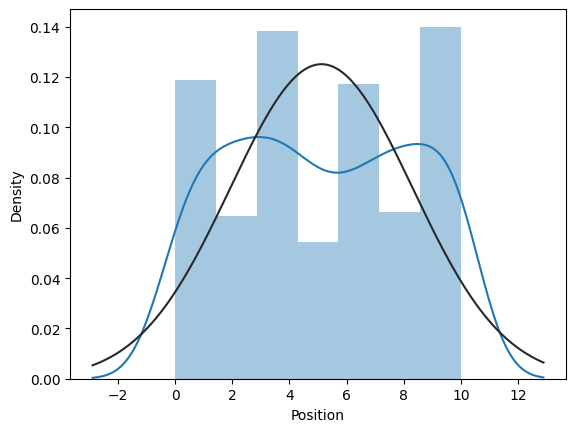

Salary 0.5483324560774053


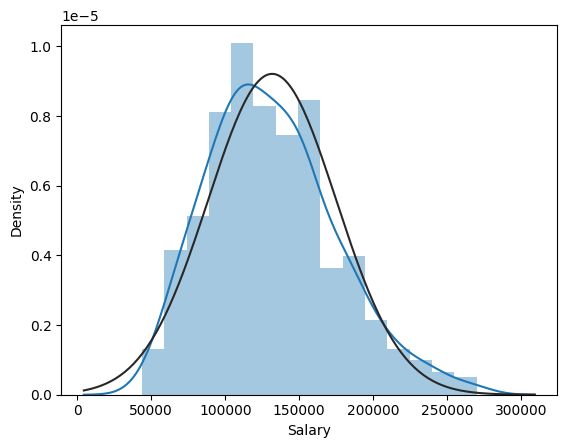

In [29]:
#skew value should nearer to 0(-0.3 to 0.3)
for i in df.columns:
  print(i, df[i].skew())
  sns.distplot(df[i],fit=norm)
  plt.show()

In [31]:
#we dont have skewness in this data

In [32]:
from scipy.stats import kurtosis

In [33]:
for i in df.columns:   
    print(i, kurtosis(df[i]))


Gender -1.9995999599959997
Experience (Years) -1.23377760624889
Position -1.2648410123760596
Salary 0.09270807500098632


## statistical testing

In [39]:
#correlation checking - corr value should be nearer to 1 or -1
#if its nearer to 1/-1 then there is some connectivity between those two columns

corr_matrix =df.corr()
corr_matrix

,Gender,Experience (Years),Position,Salary
Gender,1.000000,-0.015869,-0.033302,-0.021238
Experience (Years),-0.015869,1.000000,-0.027420,0.618530
Position,-0.033302,-0.027420,1.000000,-0.350686
Salary,-0.021238,0.618530,-0.350686,1.000000


#correlation Observations:

Gender: this column shows weak correlation with other variables
Experience (Years): this shows very strong correlation with salary column, so we can say if experience is high then salary is also high
Position: this shows strong correlation with salary column, so we can say  salary is will increase depends upon the position
Salary: this shows strong correlation with Experience and position column


In [40]:
#Variables like SExperience (Years), Position could be important 

## Hypothesis testing

In [41]:
for i in df.columns:
  print(i,df[i].nunique())

Gender 2
Experience (Years) 21
Position 11
Salary 400


In [43]:
cont = []
cat = []
for i in df.columns:
  if df[i].nunique()>12:
    cont.append(i)
  else:
    cat.append(i)

print(cont,cat)

['Experience (Years)', 'Salary'] ['Gender', 'Position']


In [44]:
def two_sample(d1,d2): #for two continous variable
  m =[0,0]
  for i in range(31):
    sample1 = d1.sample(frac=0.03)
    sample2 = d2.sample(frac=0.04)
    t_test, p_value = stats.ttest_ind(sample1,sample2)
    if p_value < 0.04:
      m[1]+=1
    else:
      m[0]+=1
    if m[0]>m[1]:
      return True
    elif m[0]<m[1]:
      return False

def chi_square(d1,d2): #for two categorical variable
  return True if stats.chi2_contingency(pd.crosstab(d1,d2))[1]<0.075 else False

def annova(d1,d2): #assume d1 - continous, d2 - category (for 1cat and 1cont variable)
  group = df[d2].unique()

  data1 = {}
  for i in group:
    data1[i]=df[d1][df[d2]==i]


  f_value , p_value = stats.f_oneway(*[i for i in data1.values()])
  if p_value<0.075:
    return False
  else:
    return True



In [45]:
final = {}
for i in df.columns:
  final[i] = {}
  for j in df.columns:

    if i in cont and j in cont:
      result = two_sample(df[i],df[j])

    elif i in cat and j in cat:
      result = chi_square(df[i],df[j])

    elif i in cont and j in cat:
      result = annova(i,j)

    elif i in cat and j in cont:
      result = annova(j,i)
    if result :
      final[i][j]=1
    else:
      final[i][j]=0

In [46]:
final_df = pd.DataFrame(final)
final_df

,Gender,Experience (Years),Position,Salary
Gender,1,1,0,1
Experience (Years),1,1,1,0
Position,0,1,1,0
Salary,1,0,0,1


<Axes: >

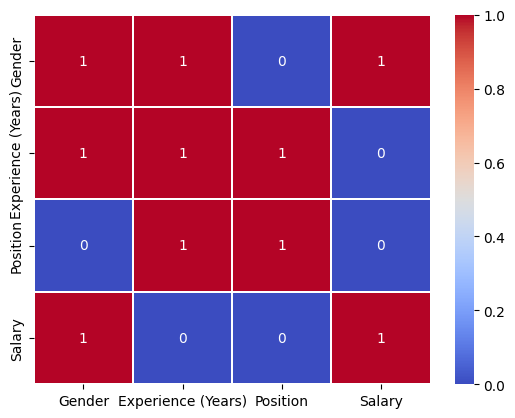

In [47]:
sns.heatmap(final_df,cmap ="coolwarm",linewidths=0.2,annot=True)

Hypothesis testing obrevations

from this heatmap we can cleary most of the variables have strong relationship with other columns
